### Visualização <br>
Uma das maneiras mais simples de visualizar a distribuição dos dados é através de gráficos de frequência e histogramas. <br>
Um exemplo de um gráfico de frequência:

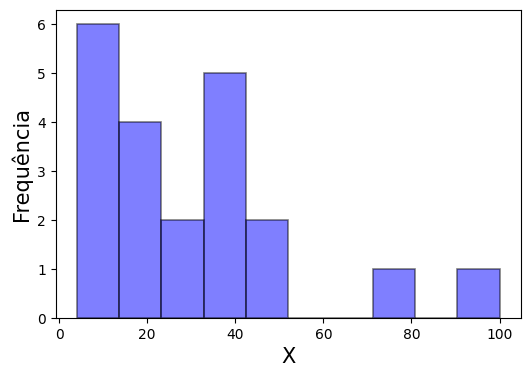

In [5]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]

fig = plt.figure(figsize=(6,4))

num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, density=False, edgecolor='black', linewidth=1.2)
plt.xlabel("X", fontsize = 15)
plt.ylabel("Frequência", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

No caso do histograma, a área sob a curva deve ser igual a 1 (notem a diferença na escala do eixo das ordenadas(y))

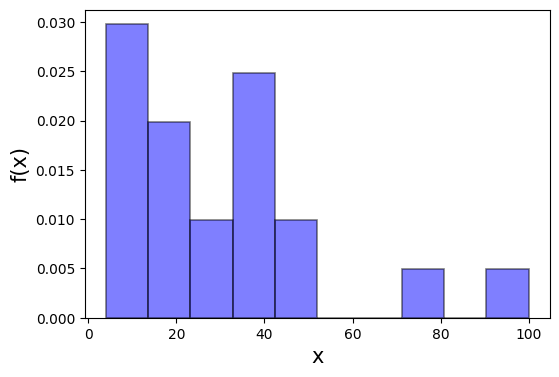

In [7]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x = [21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]

fig= plt.figure(figsize=(6,4))

num_bins = 10
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, density=True, edgecolor='black', linewidth=1.2)
plt.xlabel("x", fontsize = 15)
plt.ylabel("f(x)", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

No caso das variáveis nominais, podemos usar gráficos de barra ou gráficos de setores. Notem que o valor no eixo das abscissas (x) é arbitrário e não deve ser levado em conta.

Y: ['Bom', 'Ruim', 'Ótimo', 'Regular', 'Regular', 'Ótimo', 'Ótimo', 'Bom', 'Ótimo', 'Bom', 'Ótimo']
Valores possíveis: ['Bom' 'Regular' 'Ruim' 'Ótimo']
Frequência dos valores: [3. 2. 1. 5.]


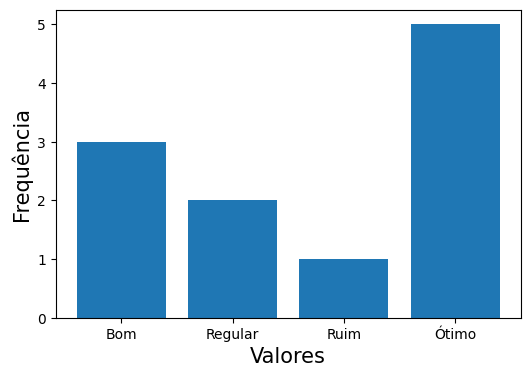

In [10]:
Y = ["Bom", "Ruim", "Ótimo", "Regular", "Regular", "Ótimo", "Ótimo","Bom", "Ótimo", "Bom", "Ótimo"]
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos
values = np.sort(np.unique(Y)) #usamos a funções sort e unique do Numpy para encontrar os valores possíveis.
#vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) #armazena as frequencias
ind = 0 #indice do vetor de frequências
for i in values: #para os valores diferentes
    counter = 0 #conta as ocorrências
    for j in range(0,len(Y)):
        if(Y[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('Y:',Y)
print('Valores possíveis:', values)
print('Frequência dos valores:', freq)

fig= plt.figure(figsize=(6,4))

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Valores",fontsize = 15) 
plt.ylabel("Frequência", fontsize = 15) 
plt.show()

Gráfico de setores:

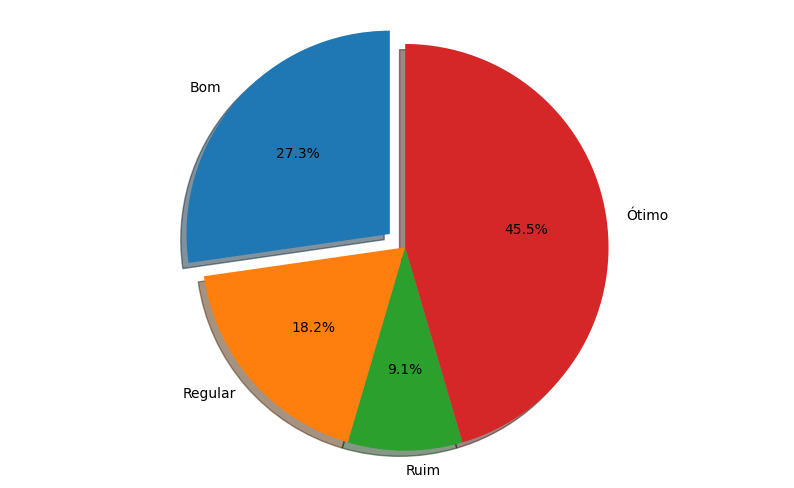

In [15]:
labels = values
sizes = freq
explode = (0.1, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Outro gráfico importante é o scatterplot, usado quando queremos verificar a relação entre duas variáveis.

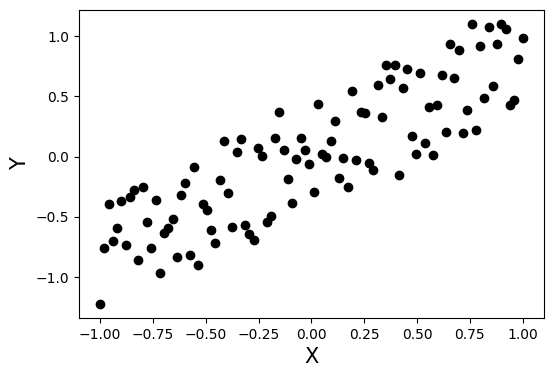

In [16]:
N = 100
X = np.linspace(-1,1, N) #gera N valores em [-1,1]
erro = np.random.uniform(-1,1,N) #ruído a ser incluído na relação linear.
sigma= 0.5
Y = 0.8*X + erro*sigma

fig= plt.figure(figsize=(6,4))

plt.scatter(X, Y, marker='o', color = 'black');
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("X",fontsize = 15) 
plt.ylabel("Y", fontsize = 15) 
plt.show(True)

Quando temos três variáveis, uma maneira de visualizarmos os dados é considerar um gráfico de calor, sendo que a escala de cores define a terceira variável.

C:\Users\João Pedro Holanda\AppData\Local\Temp\ipykernel_11280\3928594061.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights.pivot("month", "year", "passengers")


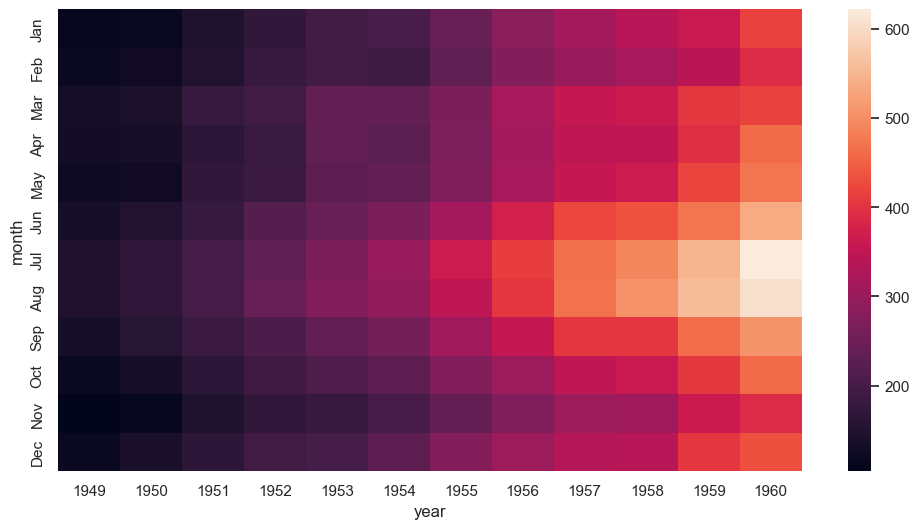

In [17]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)

plt.figure(figsize=(12,6))

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
#mostra o gráfico
ax = sns.heatmap(flights)

### Medidas de posição <br>
#### Moda <br>
Uma medida importante de tendência central é a moda, que retorna o elemento mais comum em um conjunto de dados. Geralmente, essa medida é usada para atributos nominais. <br>
Para calcularmos a moda, usamos o pacote Statistics:

In [18]:
from statistics import mode
X = [1,2,3,1,2,3,4,1,3,6,4,1]
m = mode(X)
print('A moda de X:', m)

A moda de X: 1


Notem que essa biblioteca retorna um erro se houver mais de uma moda. Nesse caso, temos que implementar uma função para retornar todas as modas possíveis.

In [19]:
X = [1,1,2,2,3]
m = mode(X)
print('A moda de X:', m)

A moda de X: 1


In [20]:
def new_mode(X):
    values = np.sort(np.unique(X)) 
    #vamos calcular a frequência de cada valor presente na lista
    freq = np.zeros(len(values)) #armazena as frequencias
    ind = 0 #indice do vetor de frequências
    for i in values: #para os valores diferentes
        counter = 0 #conta as ocorrências
        for j in range(0,len(X)):
            if(X[j] == i):
                counter = counter + 1
        freq[ind] = counter
        ind = ind + 1
    mx = max(freq)
    md = []
    for i in range(0,len(freq)):
        if(freq[i] == mx):
            md.append(values[i])
    return md
moda = new_mode(X)
print('Moda:', moda)

Moda: [1, 2]


Podemos também identificar a moda visualmente em um gráfico de barras, que representa o valor mais frequente.

X: [1, 1, 2, 2, 3]
Valores possíveis: [1 2 3]
Frequencia dos valores: [2. 2. 1.]


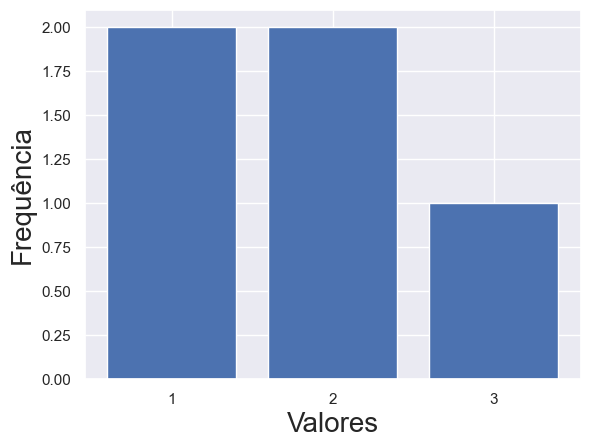

In [21]:
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

#Usamos a funções sort e unique do Numpy para encontrar 
#os valores possíveis em ordem crescente.
#esses valores serão mostrados na abscissa do gráfico.
values = np.sort(np.unique(X)) 
#vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) #armazena as frequencias
ind = 0 #indice do vetor de frequências
for i in values: #para os valores diferentes
    counter = 0 #conta as ocorrências
    for j in range(0,len(X)):
        if(X[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('X:',X)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xlabel("Valores",fontsize = 20) 
plt.ylabel("Frequência", fontsize = 20) 

plt.show()

Podemos aplicar a função em dados nominais:

In [22]:
Y = ["red", "blue", "blue", "red", "green", "red", "red"]
print('A moda de Y:', mode(Y))

A moda de Y: red


O gráfico de barras mostrando a frequência:

Y: ['red', 'blue', 'blue', 'red', 'green', 'red', 'red']
Valores possíveis: ['blue' 'green' 'red']
Frequência dos valores: [2. 1. 4.]


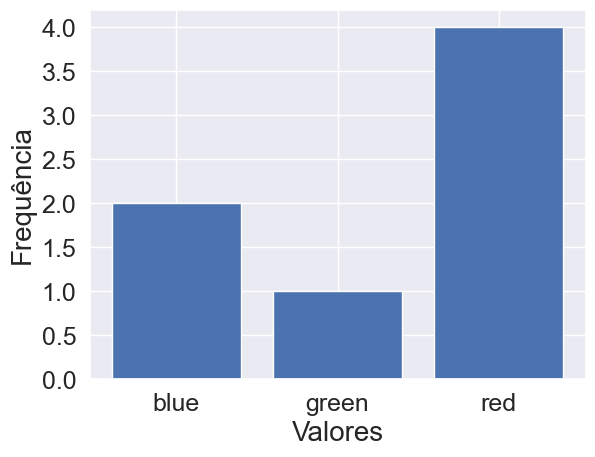

In [23]:
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos
values = np.sort(np.unique(Y)) #usamos a funções sort e unique do Numpy para encontrar os valores possíveis.
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) #armazena as frequencias
ind = 0 #indice do vetor de frequências
for i in values: #para os valores diferentes
    counter = 0 #conta as ocorrências
    for j in range(0,len(Y)):
        if(Y[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('Y:',Y)
print('Valores possíveis:', values)
print('Frequência dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Valores",fontsize = 20) 
plt.ylabel("Frequência", fontsize = 20) 
plt.show()

Ou ainda em um gráfico de setores:

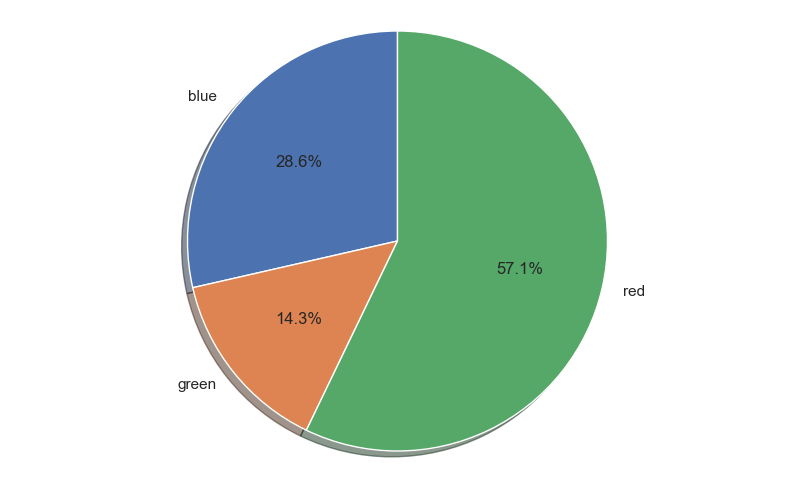

In [24]:
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(freq, explode=(0, 0, 0), labels=values, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()